In [1]:
import logit
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import importlib
importlib.reload(logit)


metrics = logit.load_DB()


loaded previous DB!!


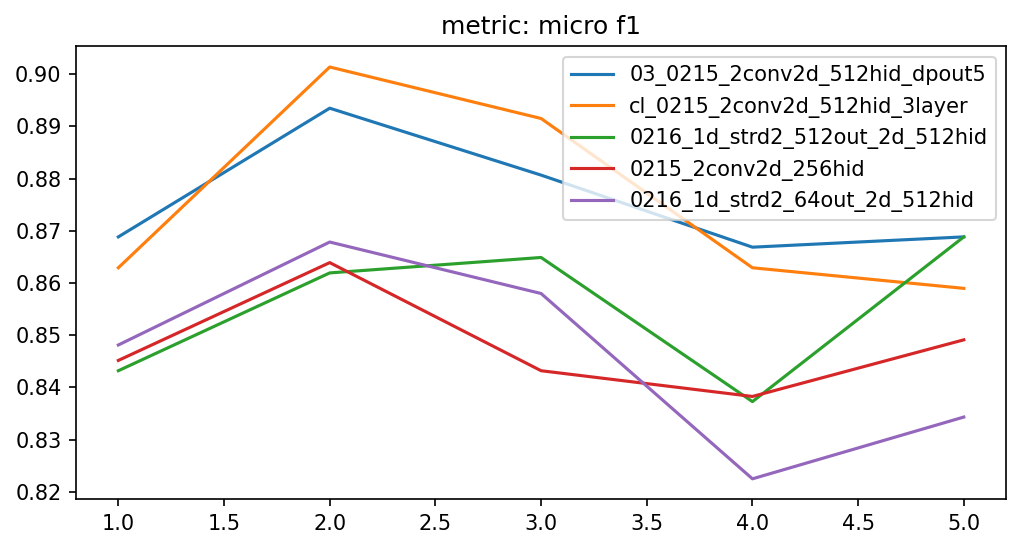

In [16]:
def fill_empty(data):
    for d in data:
        for k, l in d.items():
            len_l = len(l)
            for _ in range(logit.MAX_RUNS-len_l):
                l.append(0)
    
def exclude_log_name(name):
    if 'seizure' in name:
        return True
    return False
    
def exclude_log_data(data):
    d = np.array(data)
    if np.min(d) > 0.1 and np.min(d) < 0.6:
        return True
    return False


def skip(name, data):
    skip = exclude_log_data(data) or exclude_log_name(name)
    return skip

def topk_data(datas, K=5):
    topk = []
    top_mean = dict()
    for i, d in enumerate(datas):
        for k, v in d.items():
            top_mean[i] = np.array(v).mean()
    sorted_data = sorted(top_mean.items(), key=lambda x: x[1], reverse=True)
    for i in range(K):
        topk.append(datas[sorted_data[i][0]])
    return topk
    
    
def plot_metrics(db):
    legends = []
    xs = list(range(1, logit.MAX_RUNS+1))
    plt.figure(figsize=(8,4), dpi=100)
    datas = []
    for k, v in db.items():
        data = v[logit.m1]
        if skip(k, data):
            continue
        datas.append({k:data})
    top_k = topk_data(datas, K=5)
    a = dict()
    fill_empty(top_k)
    yss = []
    
    for d in top_k:
        for k, v in d.items():
            legends.append(k)
            yss.append(v)
    for ys in yss:
        plt.plot(xs, ys)
    plt.legend(legends)
    plt.title(f'metric: {logit.m1}')
    plt.show()
    
plot_metrics(metrics)

In [34]:
l  = np.array([1,2,3,4])
data = np.array(l)
print(data)

TypeError: 'fill_empty' is an invalid keyword argument for this function